##  Import packages

In [1]:
import wandb
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline     

import seaborn as sns
sns.set(color_codes=True)

## Load data

In [2]:
# Initialise the run
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

wandb: Currently logged in as: claudiafidelis17 (claudiam). Use `wandb login --relogin` to force relogin


In [3]:
# Getting the artifact with the data
artifact = run.use_artifact("sample.csv:latest")
local_path = artifact.file()
# Load the data into a data frame
df = pd.read_csv(local_path)

In [4]:
# Returns 5 rows, string from the top
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


## Inspect the data

In [5]:
# Remove the duplicate rows from a DataFrame
# Reset_index will delete the index instead of inserting it back into the columns of the DataFrame
df = df.drop_duplicates().reset_index(drop=True)

In [6]:
# Prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [7]:
import ipywidgets

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/claufid/miniconda3/envs/mlflow-d8139eae8e51691c86c520509c408f06b3282ee3/lib/python3.8/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_das

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

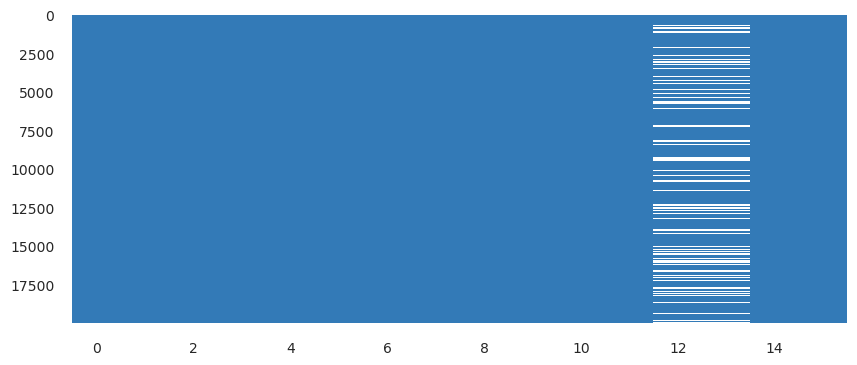

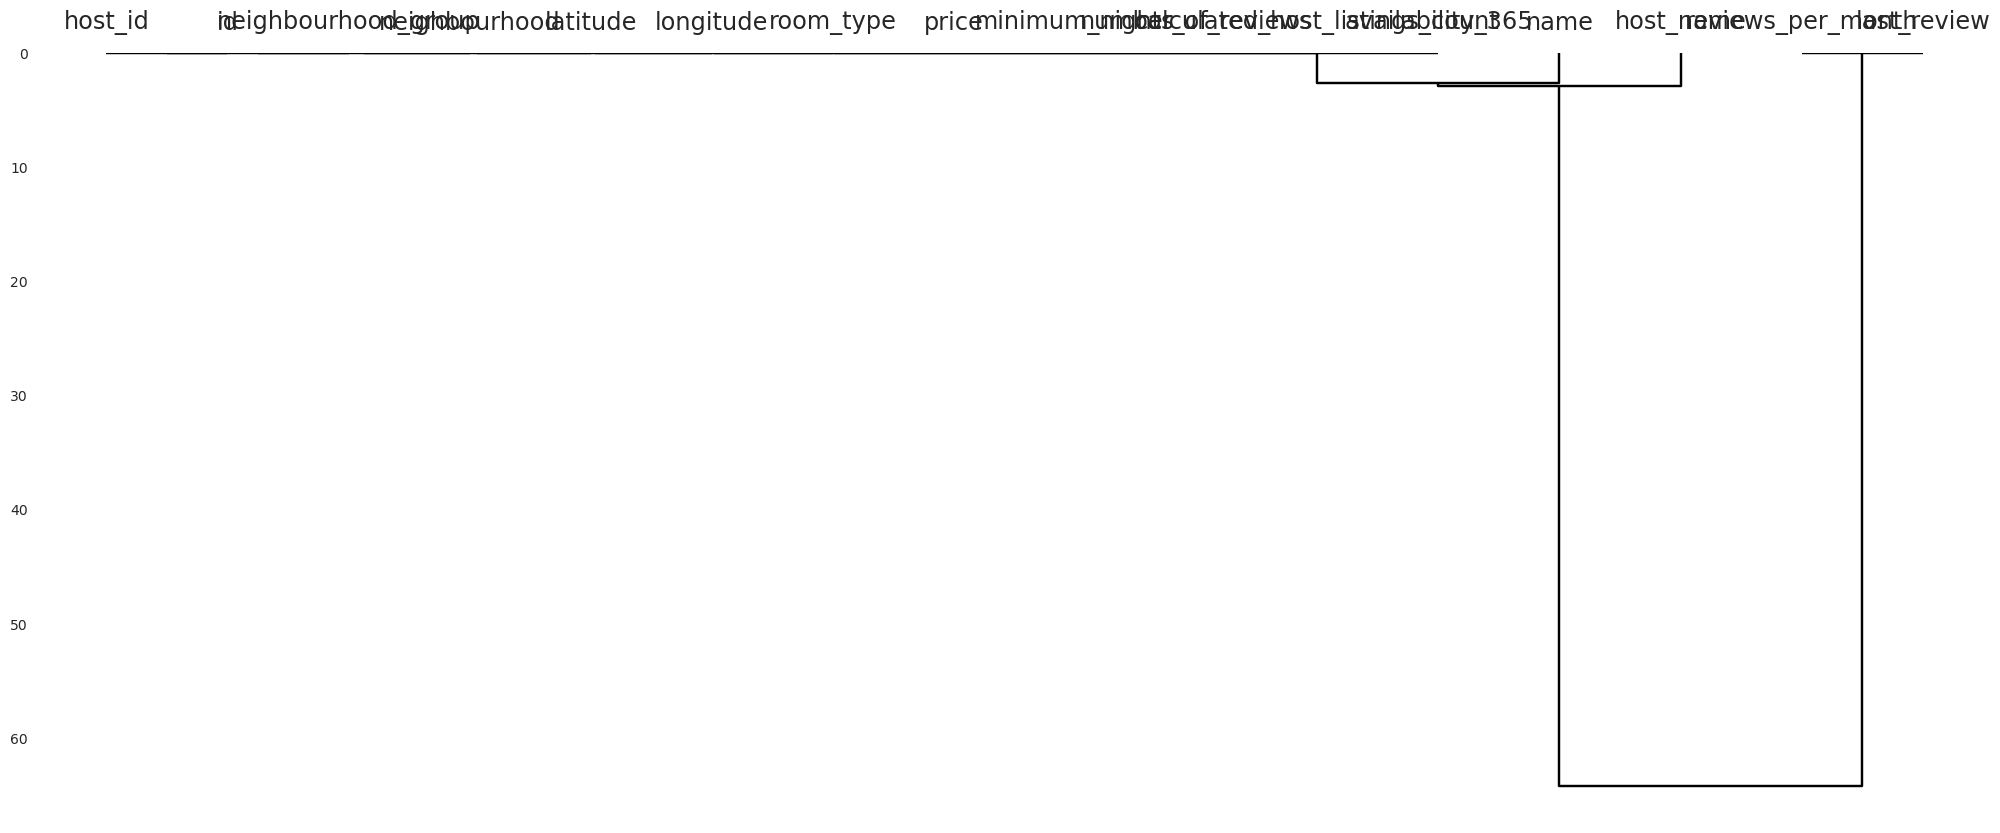

In [8]:
import pandas_profiling

# Run the profile report on the dataframe
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

There are missing values in a few columns and the column last_review is a date but it is in string format. 
Look also at the price column, and note the outliers.

## Drop outliers and convert last_review to datetime

In [9]:
# Drop outliers, only keeps records with price values between $10 and $ 350 per night
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [10]:
# Prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

In [11]:
run.finish()